In [3]:
#importing data from 'Cleaning data'
%store -r data
#Renaming the municipality 'Ålborg' to 'Aalborg' to fit the gdfs 'KOMNAVN' MEN DET GØR DEN IKKE! 
replace_values = {'Ålborg' : 'Aalborg'}
#data.replace({"Kommune": replace_values})  
d = {'Ålborg': 'Aalborg'}
data['Kommune'].replace(d,inplace = True)

In [4]:
#Calculation the total wind energi capacity per municipality
kom_MW_total = data.groupby('Kommune').apply(lambda x: x['Kapacitet (kW)'].sum()/1000)
kom_MW_total.head()

Kommune
Aabenraa     86.226
Aalborg     158.030
Allerød       2.747
Assens       31.151
Billund      92.575
dtype: float64

In [5]:
#Calculation the total electricity produced by wind turbines per municipality
prod_cols=['p2008','p2009', 'p2010', 'p2011', 'p2012', 'p2013', 'p2014', 'p2015', 'p2016','p2017', 'p2018']
kom_prod_total = data.groupby(data.Kommune.values).apply(lambda x: x[prod_cols].sum()/1000000).reset_index()

#Adding 'Total Production' = Total_prod to the kom_prod_total
kom_prod_total['L10year_prod']=kom_prod_total.sum(axis=1)
kom_prod_total.rename(columns={'index':'Kommune'}, inplace=True)
kom_prod_total.tail()



,Kommune,p2008,p2009,p2010,p2011,p2012,p2013,p2014,p2015,p2016,p2017,p2018,L10year_prod
76,Vesthimmerlands,120.412482,133.586108,164.527002,235.576486,256.589551,255.070112,285.590715,330.808653,264.666162,299.471495,253.553780,2599.852547
77,Viborg,61.879577,70.461198,68.117935,81.641367,78.747770,95.309769,112.993406,149.428751,121.008696,133.167539,110.989783,1083.745791
78,Vordingborg,36.392580,32.630562,30.968886,36.544643,34.122600,31.075127,33.835154,37.934436,29.878196,35.571491,29.282802,368.236478
79,Århus,21.910522,19.580234,16.552827,22.582937,21.355769,19.021514,20.587272,23.183657,18.119259,20.301422,18.218621,221.414037
80,Ærø,21.989996,20.178910,19.210930,26.637885,43.792352,41.486246,45.216596,44.312527,37.461961,41.296356,38.543020,380.126778


In [6]:
#Extracting the year a wind turbine is connected to the grid
#Accessing the datetime attributes
data['Dato for oprindelig nettilslutning'].dt.year

#Year of grid connection
connected_year = data['Dato for oprindelig nettilslutning'].dt.year
data.insert(2, "Year of grid connection", connected_year)

In [7]:
#import pandas as pd
#count_of_grid_connects = data.groupby('Year of grid connection').count().reset_index()


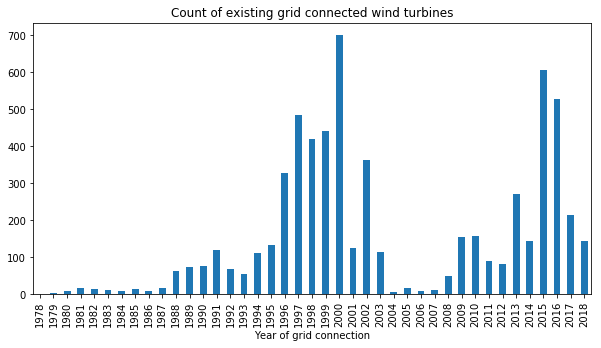

In [15]:
data.groupby('Year of grid connection')['Dato for oprindelig nettilslutning'].count().plot.bar(legend=False, figsize=(10,5), title='Count of existing grid connected wind turbines') 


Text(0.5, 0, 'Year connected to grid')

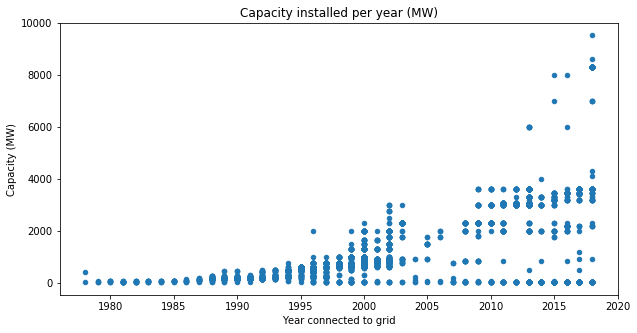

In [18]:
#Plotting the grid connected capacity in a given year
cx = data.plot.scatter(x='Year of grid connection',y='Kapacitet (kW)',
figsize=(10,5), title='Capacity installed per year (MW)')


#Setting the axis titles
cx.set_ylabel("Capacity (MW)")
cx.set_xlabel("Year connected to grid")